# Introduction to DataJoint

[DataJoint](https://datajoint.io/) is a free, open-source framework for programming scientific databases and computational data pipelines. 

```
pip install datajoint
```

In [1]:
import datajoint as dj

## Access the schema and helper modules

This notebook assumes you have access to a copy of the SQL database that houses the functional data and the functional data schema repository. Set-up instructions are [here](https://www.microns-explorer.org/cortical-mm3#f-data).

Find the technical documentation describing the data [here](https://www.microns-explorer.org/cortical-mm3#f-data).

This notebook will go over how to use DataJoint to access the functional data and the contents of the schema. For an overview of how to use CAVE to access the connectomics data, see [here](https://github.com/AllenInstitute/MicronsBinder/blob/master/notebooks/mm3_intro/SynapseAndAnnotationQuery.ipynb).

In [2]:
from phase3 import nda, func, utils

## ERD

[ERD](https://docs.datajoint.io/python/definition/11-ERD.html) stands for entity relationship diagram. Tables are depicted as nodes and dependencies as directed edges between them.

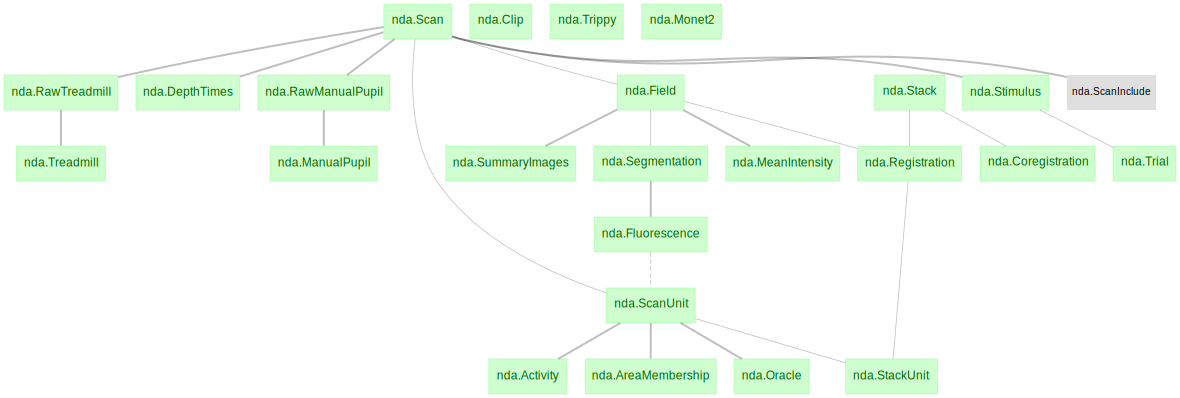

In [3]:
dj.ERD(nda) # View schema ERD

## Basic DataJoint tutorial and data introduction

This tutorial will focus on basic DataJoint usage and introduce the functional data in the schema. 

For detailed information on the contents of the schema, please find our technical documentation [here](https://www.microns-explorer.org/cortical-mm3#f-data). 



### Scan table

Information from the completed scans are located in `nda.Scan`. Access the table by calling:

In [4]:
nda.Scan()

*session    *scan_idx    nframes     nfields     fps       
+---------+ +----------+ +---------+ +---------+ +--------+
4           7            40000       8           6.3009    
4           9            35112       8           6.3009    
4           10           40000       8           6.3009    
5           3            40000       8           6.3009    
5           6            40000       8           6.3009    
5           7            40000       8           6.3009    
6           2            40000       8           6.3009    
6           4            40000       8           6.3009    
6           6            40000       8           6.3009    
6           7            40000       8           6.3009    
7           3            40000       8           6.3009    
7           4            40000       8           6.3009    
   ...
 (Total: 19)

### Primary keys

[Primary](https://docs.datajoint.io/python/definition/07-Primary-Key.html?) keys are a subset of its attributes that uniquely identify each entity in the table.

In [5]:
[*nda.Scan.heading.primary_key] # primary keys 

['session', 'scan_idx']

### Restrict to a single scan

Dictionaries serve as keys for restricting table entries. Scans are indexed by `session` and `scan_idx`. The `session` attribute is the ID indicating the imaging period for the mouse. `scan_idx` is the index of the scan within the imaging session.

In [6]:
scan_key = {'session': 4, 'scan_idx': 7} 

In [7]:
nda.Scan & scan_key

*session    *scan_idx    nframes     nfields     fps       
+---------+ +----------+ +---------+ +---------+ +--------+
4           7            40000       8           6.3009    
 (Total: 1)

### Restrict to a couple of scans

Use a list of dictionaries to restrict to multiple entries.

In [8]:
scan_keys = [{'session': 4, 'scan_idx': 7}, {'session': 5, 'scan_idx': 3}]

In [9]:
nda.Scan & scan_keys

*session    *scan_idx    nframes     nfields     fps       
+---------+ +----------+ +---------+ +---------+ +--------+
4           7            40000       8           6.3009    
5           3            40000       8           6.3009    
 (Total: 2)

### Fetch some information from a single scan

The [Fetch](https://docs.datajoint.io/python/queries/03-Fetch.html) methods allow for retrieval of the data within the tables. Use the `fetch1` method to retrieve the contents of the table for a single row. It will error if the restriction yields more than one row. 

In [10]:
nframes, nfields = (nda.Scan & scan_key).fetch1('nframes', 'nfields')
print(f'number of frames in this scan: {nframes}, number of imaging fields in this scan: {nfields}')

number of frames in this scan: 40000, number of imaging fields in this scan: 8


### Fetch some information from a couple of scans

Use `fetch` if the restriction yields more than one row. It will return a list for each attribute that is fetched. To fetch all attributes, do not pass any attributes to the `fetch` method

In [11]:
nframes, nfields = (nda.Scan & scan_keys).fetch('nframes', 'nfields')
print(f'number of frames in these scans: {nframes}, number of fields in these scans: {nfields}')

number of frames in these scans: [40000 40000], number of fields in these scans: [8 8]


### Fetch scans keys

Pass in `'KEY'` to `fetch` or `fetch1` to retrieve a list of dictionary keys.

In [12]:
nda.Scan.fetch('KEY')

[{'session': 4, 'scan_idx': 7},
 {'session': 4, 'scan_idx': 9},
 {'session': 4, 'scan_idx': 10},
 {'session': 5, 'scan_idx': 3},
 {'session': 5, 'scan_idx': 6},
 {'session': 5, 'scan_idx': 7},
 {'session': 6, 'scan_idx': 2},
 {'session': 6, 'scan_idx': 4},
 {'session': 6, 'scan_idx': 6},
 {'session': 6, 'scan_idx': 7},
 {'session': 7, 'scan_idx': 3},
 {'session': 7, 'scan_idx': 4},
 {'session': 7, 'scan_idx': 5},
 {'session': 8, 'scan_idx': 5},
 {'session': 8, 'scan_idx': 7},
 {'session': 8, 'scan_idx': 9},
 {'session': 9, 'scan_idx': 3},
 {'session': 9, 'scan_idx': 4},
 {'session': 9, 'scan_idx': 6}]

Fetch a single key.

In [13]:
(nda.Scan & scan_key).fetch1('KEY')

{'session': 4, 'scan_idx': 7}

### Included Scans

Scans designated for inclusion into analysis are found in `nda.ScanInclude`. Restrict against `nda.Scan` to apply.

In [14]:
nda.Scan & nda.ScanInclude

*session    *scan_idx    nframes     nfields     fps        
+---------+ +----------+ +---------+ +---------+ +---------+
4           7            40000       8           6.3009     
5           6            40000       8           6.3009     
5           7            40000       8           6.3009     
6           2            40000       8           6.3009     
6           4            40000       8           6.3009     
6           6            40000       8           6.3009     
6           7            40000       8           6.3009     
7           3            40000       8           6.3009     
7           4            40000       8           6.3009     
7           5            40000       8           6.3009     
8           5            40000       8           6.3009     
9           3            50000       6           8.61754    
   ...
 (Total: 14)

### Field information

Each scan (identified by `session` and `scan_idx`) can have multiple imaging fields. These fields are indexed by the `field` attribute. `nda.Field` containes information for all imaging fields available for a scan.

In [15]:
nda.Field & scan_key

*session    *scan_idx    *field    px_width     px_height     um_width     um_height     field_x     field_y     field_z    
+---------+ +----------+ +-------+ +----------+ +-----------+ +----------+ +-----------+ +---------+ +---------+ +---------+
4           7            1         248          440           620.0        1100.0        -485.0      -235.0      80.0       
4           7            2         248          440           620.0        1100.0        95.0        -235.0      80.0       
4           7            3         248          440           620.0        1100.0        -485.0      -235.0      220.0      
4           7            4         248          440           620.0        1100.0        95.0        -235.0      220.0      
4           7            5         248          440           620.0        1100.0        -485.0      -235.0      360.0      
4           7            6         248          440           620.0        1100.0        95.0        -235.0      360.0      
4           7            7         248          440           620.0        1100.0        -485.0      -235.0      500.0      
4           7            8         248          440           620.0        1100.0        95.0        -235.0      500.0      
 (Total: 8)

Use a `field_key` to restrict to a single entry.

In [16]:
field_key = {'session': 4, 'scan_idx': 7, 'field': 4}

In [17]:
nda.Field & field_key

*session    *scan_idx    *field    px_width     px_height     um_width     um_height     field_x     field_y     field_z    
+---------+ +----------+ +-------+ +----------+ +-----------+ +----------+ +-----------+ +---------+ +---------+ +---------+
4           7            4         248          440           620.0        1100.0        95.0        -235.0      220.0      
 (Total: 1)

## Depth Times

In [18]:
import numpy as np

The timestamp of each scan frame (in seconds) relative to the start of the scan is located in `nda.DepthTimes`. 

In [19]:
nda.DepthTimes() & scan_key

*session    *scan_idx    field1_tim ndepths     depth_time
+---------+ +----------+ +--------+ +---------+ +--------+
4           7            =BLOB=     4           =BLOB=    
 (Total: 1)

The `field1_times` attribute contains the timestamp for each frame synced to the first pixel of the `field 1` in `nda.Field`.

In [20]:
field1_times = (nda.DepthTimes & scan_key).fetch1('field1_times')
len(field1_times)

40000

`ndepths` contains the number of unique depths across all imaging fields. It can be computed by restricting against the DataJoint [universal set](https://docs.datajoint.io/python/queries/11-Universal-Sets.html) for field depth in the attribute `field_z`. 

In [21]:
nda.Field & scan_key

*session    *scan_idx    *field    px_width     px_height     um_width     um_height     field_x     field_y     field_z    
+---------+ +----------+ +-------+ +----------+ +-----------+ +----------+ +-----------+ +---------+ +---------+ +---------+
4           7            1         248          440           620.0        1100.0        -485.0      -235.0      80.0       
4           7            2         248          440           620.0        1100.0        95.0        -235.0      80.0       
4           7            3         248          440           620.0        1100.0        -485.0      -235.0      220.0      
4           7            4         248          440           620.0        1100.0        95.0        -235.0      220.0      
4           7            5         248          440           620.0        1100.0        -485.0      -235.0      360.0      
4           7            6         248          440           620.0        1100.0        95.0        -235.0      360.0      
4           7            7         248          440           620.0        1100.0        -485.0      -235.0      500.0      
4           7            8         248          440           620.0        1100.0        95.0        -235.0      500.0      
 (Total: 8)

In [22]:
unique_field_depths = dj.U('field_z') & (nda.Field & scan_key)
print(f'The number of unique depths is: {len(unique_field_depths)}')
unique_field_depths

The number of unique depths is: 4


*field_z   
+---------+
80.0       
220.0      
360.0      
500.0      
 (Total: 4)

The attribute `depth_times` contains the timestamp (in seconds) of each scan frame for the first pixel of the first field at each depth relative to the start of the scan.

In [23]:
depth_times, ndepths = (nda.DepthTimes() & scan_key).fetch1('depth_times', 'ndepths')
print(depth_times.shape[0], ndepths)

160000 4


In the above example scan, there are 160000 frames in `depth_times` and 4 depths (`ndepths=4`), meaning that each depth there are `160000/ndepths = 40000` frames.

The depths are interleaved and can be separated as such:

In [24]:
depth1_times = depth_times[::ndepths]
depth2_times = depth_times[1::ndepths]
depth3_times = depth_times[2::ndepths]
depth4_times = depth_times[3::ndepths]

Note that in this example, `depth1_times` is equivalent to `field1_times`, because `field 1` is the first field at depth 1. 

`field 3` is the first field at `depth 2`, therefore `depth2_times` represent the timestamps for the first pixel in `field 3`.

`field 5` is the first field at `depth 3`, therefore `depth3_times` represent the timestamps for the first pixel in `field 5`.

`field 7` is the first field at `depth 4`, therefore `depth4_times` represent the timestamps for the first pixel in `field 7`

In [25]:
np.all(depth1_times == field1_times) # these are equivalent

True

You can confirm that the timestamps are synced to the scan frames by recovering the scan fps. 

In [26]:
fps = (nda.Scan & scan_key).fetch1('fps')
fps

6.3009

In [27]:
(1 / np.diff(field1_times)).mean() # average frequency of timestamps

6.298454818003098

Therefore, it follows that `depth_times` which contains the scan times across `ndepths` will have a frequency of `ndepths` * `fps`.

In [28]:
(1 / np.diff(depth_times)).mean()

25.193879748238476

In [29]:
ndepths * fps

25.2036

Examples of when to use `field1_times` vs `depth_times` are discussed below.

### Stimulus

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

The movie shown to the mouse for each scan is housed in `nda.Stimulus`. The movie is synced to the timestamps for the first field (`field 1`) in the scan.

In [31]:
nda.Stimulus & scan_key

*session    *scan_idx    movie     
+---------+ +----------+ +--------+
4           7            =BLOB=    
 (Total: 1)

In [32]:
movie = (nda.Stimulus & scan_key).fetch1('movie')
movie_times = (nda.DepthTimes() & scan_key).fetch1('field1_times')
print(len(movie), len(movie_times))

40000 40000


A trial represents a short segment of the stimulus. Trial information is logged in `nda.Trial` and indexed by `trial_idx`. 

There are three types of trials: `Clip`, `Monet2`, and `Trippy`. 

`Clip` types show segments that contain high-entropy scenes such as Hollywood clips, sports clips and rendered movies. 

`Monet2` and `Trippy` types show parametric segments. 

Each stimulus segment has a unique identifier in its `condition_hash` and are indexed in the tables `nda.Clip`, `nda.Monet2`, and `nda.Trippy`. 

`start_idx` and `stop_idx` are the indices of the movie in `nda.Stimulus` during which the trial was ongoing. 

`start_frame_time` and `end_frame_time` are the timestamps of the `start_idx` and `end_idx` in seconds relative to the start of the scan. They closely match the timestamps retrieved when `start_idx` and `end_idx` are used to index in `field1_times` from `nda.DepthTimes`.

`frame_times` are the timestamps of every frame shown in the movie segment at the original presentation frequency (not synced to the scan).

In [33]:
nda.Trial & scan_key

*session    *scan_idx    *trial_idx    type       start_idx     end_idx     start_frame_ti end_frame_time frame_time condition_hash
+---------+ +----------+ +-----------+ +--------+ +-----------+ +---------+ +------------+ +------------+ +--------+ +------------+
4           7            0             Clip       55            118         8.704266956308 18.67078011319 =BLOB=     JEL5/i5FccX4yk
4           7            1             Clip       119           182         18.77076618955 28.73727791593 =BLOB=     AAQ1HNKGrg1cIX
4           7            2             Clip       182           245         28.83727281377 38.80377309606 =BLOB=     ksTS42zV+O0YJq
4           7            3             Clip       246           308         38.90376775548 48.87027232930 =BLOB=     m5JLObtSRnbRKw
4           7            4             Clip       309           372         48.97026269719 58.93676488683 =BLOB=     L8Z/mji+v1Wipu
4           7            5             Clip       372           435         59.03676479146 69.00325315282 =BLOB=     3+VHi96yg36hu1
4           7            6             Monet2     436           530         69.11991803930 84.10301106260 =BLOB=     DKYV7TrfEl+C8n
4           7            7             Monet2     531           625         84.18633382604 99.16941802785 =BLOB=     +rgSVBVRE8Ij1W
4           7            8             Monet2     626           720         99.25274865911 114.2358347682 =BLOB=     GHn0W57E+2PS+Q
4           7            9             Monet2     721           815         114.3191687373 129.3022600917 =BLOB=     u0ftbdrw9UHzSH
4           7            10            Clip       816           878         129.3855838088 139.3520902900 =BLOB=     JOYs8Wny1GJlw6
4           7            11            Clip       879           942         139.4520937709 149.4185921458 =BLOB=     mG4xsIyTTnaRWK
   ...
 (Total: 464)

Detailed information about the stimulus during each trial can be obtained by restricting into the appropriate type-specific table. The example trial_key below restricts to a `Monet2` type trial. 

In [34]:
trial_key = {'session': 4, 'scan_idx': 7, 'trial_idx': 8}

In [35]:
trial_info = nda.Trial & trial_key
trial_info

*session    *scan_idx    *trial_idx    type       start_idx     end_idx     start_frame_ti end_frame_time frame_time condition_hash
+---------+ +----------+ +-----------+ +--------+ +-----------+ +---------+ +------------+ +------------+ +--------+ +------------+
4           7            8             Monet2     626           720         99.25274865911 114.2358347682 =BLOB=     GHn0W57E+2PS+Q
 (Total: 1)

[Join](https://docs.datajoint.io/python/queries/07-Join.html) `trial_info` with `nda.Monet2` using the `*` operator to get all available information about the stimulus during that trial. 

`Monet2` is a directional stimuli, and the vector of directions during the trial is stored in the `directions` attribute. See technical methods for a more detailed description of the contents of this and other stimulus type tables. 

In [36]:
trial_info * nda.Monet2

*session    *scan_idx    *trial_idx    *condition_has type       start_idx     end_idx     start_frame_ti end_frame_time frame_time fps        duration     rng_seed     blue_green_sat pattern_width  pattern_aspect temp_kernel    temp_bandwidth ori_coherence  ori_fraction   ori_mix     n_dirs     speed     directions onsets     movie     
+---------+ +----------+ +-----------+ +------------+ +--------+ +-----------+ +---------+ +------------+ +------------+ +--------+ +--------+ +----------+ +----------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +---------+ +--------+ +-------+ +--------+ +--------+ +--------+
4           7            8             GHn0W57E+2PS+Q Monet2     626           720         99.25274865911 114.2358347682 =BLOB=     60.000     15.000       8.0          0.000          72             1.7            hamming        4.00           2.50           1.0            1.0         16         0.2       =BLOB=     =BLOB=     =BLOB=    
 (Total: 1)

Use `start_idx` and `end_idx` to view the part of the stimulus corresponding to the trial.

In [37]:
movie = (nda.Stimulus & scan_key).fetch1('movie') # Fetch movie
movie.shape # frames x height x width

(40000, 90, 160)

In [38]:
start, end = (trial_info * nda.Monet2).fetch1('start_idx', 'end_idx') # Fetch indices of trial
print(f'Trial starts at index: {start} and ends at index {end}')

Trial starts at index: 626 and ends at index 720


In [39]:
stimulus_trial_slice = movie[slice(start, end)] # slice movie according to indices of trial
stimulus_trial_slice.shape

(94, 90, 160)

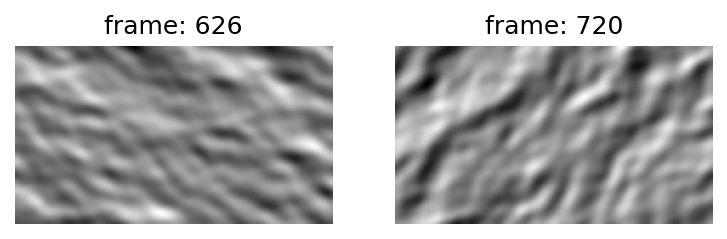

In [40]:
fig, axs = plt.subplots(1, 2, dpi=150) # view first and last frame of movie slice
axs[0].imshow(stimulus_trial_slice[0], cmap='gray')
axs[0].set_title(f'frame: {start}')
axs[1].imshow(stimulus_trial_slice[-1], cmap='gray')
axs[1].set_title(f'frame: {end}')
[ax.axis('off') for ax in axs];

### Stimulus from AWS bucket 

The stimulus can also be downloaded from the AWS bucket directly. 

In [41]:
import requests
import skvideo.io

In [42]:
base_url = 'https://bossdb-open-data.s3.amazonaws.com/iarpa_microns/minnie/functional_data/stimulus_movies'

In [43]:
filename = f'stimulus_17797_{scan_key["session"]}_{scan_key["scan_idx"]}_v1.avi'

In [44]:
url = base_url + '/' + filename
url

'https://bossdb-open-data.s3.amazonaws.com/iarpa_microns/minnie/functional_data/stimulus_movies/stimulus_17797_4_7_v1.avi'

In [45]:
movie_aws = requests.get(url) # approx 2GB

In [46]:
with open(filename, 'wb') as f:
    f.write(movie_aws.content) # will write to current directory as avi

The stimulus from the AWS bucket is interleaved over `ndepths`. Frame times for each depth can be found in `depth_times` from `nda.DepthTimes`.

In [47]:
movie_aws = skvideo.io.vread(filename, as_grey=True).squeeze() # load the avi from the local directory
movie_aws.shape

(160000, 90, 160)

In [48]:
depth_times, ndepths = (nda.DepthTimes & scan_key).fetch1('depth_times', 'ndepths')
print(depth_times.shape[0], ndepths)

160000 4


Separate the movie and frame times for each depth as such:

In [49]:
movie_depth1 = movie_aws[::ndepths]
movie_depth2 = movie_aws[1::ndepths]
movie_depth3 = movie_aws[2::ndepths]
movie_depth4 = movie_aws[3::ndepths]

times_depth1 = depth_times[::ndepths]
times_depth2 = depth_times[1::ndepths]
times_depth3 = depth_times[2::ndepths]
times_depth4 = depth_times[3::ndepths]

print(len(movie_depth1), len(times_depth1))
print(len(movie_depth2), len(times_depth2))
print(len(movie_depth3), len(times_depth3))
print(len(movie_depth4), len(times_depth4))

40000 40000
40000 40000
40000 40000
40000 40000


### Pupil and Treadmill

The pupil radius for each scan is found in `nda.RawManualPupil` and `nda.ManualPupil`. 

`pupil_min_r` is the smaller of the two radii from the ellipse fit to the pupil and `pupil_maj_r` is the larger radius. 

The tracked position of the pupil is found in `pupil_x` and `pupil_y`. 

`nda.RawManualPupil` contains the pupil traces and `pupil_times` at the original acquisition rate.

`nda.ManualPupil` contains the pupil traces synced to the `field 1` scan times (found in the `field1_times` attribute in `nda.DepthTimes`)



In [50]:
nda.RawManualPupil() & scan_key

*session    *scan_idx    pupil_min_ pupil_maj_ pupil_x    pupil_y    pupil_time
+---------+ +----------+ +--------+ +--------+ +--------+ +--------+ +--------+
4           7            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=    
 (Total: 1)

In [51]:
nda.ManualPupil & scan_key

*session    *scan_idx    pupil_min_ pupil_maj_ pupil_x    pupil_y   
+---------+ +----------+ +--------+ +--------+ +--------+ +--------+
4           7            =BLOB=     =BLOB=     =BLOB=     =BLOB=    
 (Total: 1)

The treadmill velocity for each scan is found in `nda.RawTreadmill` and `nda.Treadmill`.

`nda.RawTreadmill` contains the treadmill velocity trace and timestamps at the original acquisition rate.

`nda.Treadmill` contains the treadmill velocity trace synced to the `field 1` scan times (found in the `field1_times` attribute in `nda.DepthTimes`)

In [52]:
nda.RawTreadmill & scan_key

*session    *scan_idx    treadmill_ treadmill_
+---------+ +----------+ +--------+ +--------+
4           7            =BLOB=     =BLOB=    
 (Total: 1)

In [53]:
nda.Treadmill & scan_key

*session    *scan_idx    treadmill_
+---------+ +----------+ +--------+
4           7            =BLOB=    
 (Total: 1)

### Summary image

A summary image of the field can be found in `nda.SummaryImages`. 

There are three types of images available, `correlation`, `l6norm`, and `average`. Details of how these are computed can be found in the accompanying methods.

In [54]:
nda.SummaryImages() & field_key

*session    *scan_idx    *field    correlatio l6norm     average   
+---------+ +----------+ +-------+ +--------+ +--------+ +--------+
4           7            4         =BLOB=     =BLOB=     =BLOB=    
 (Total: 1)

#### Fetch and view images

In [55]:
corr, l6, avg = (nda.SummaryImages() & field_key).fetch1('correlation', 'l6norm', 'average')

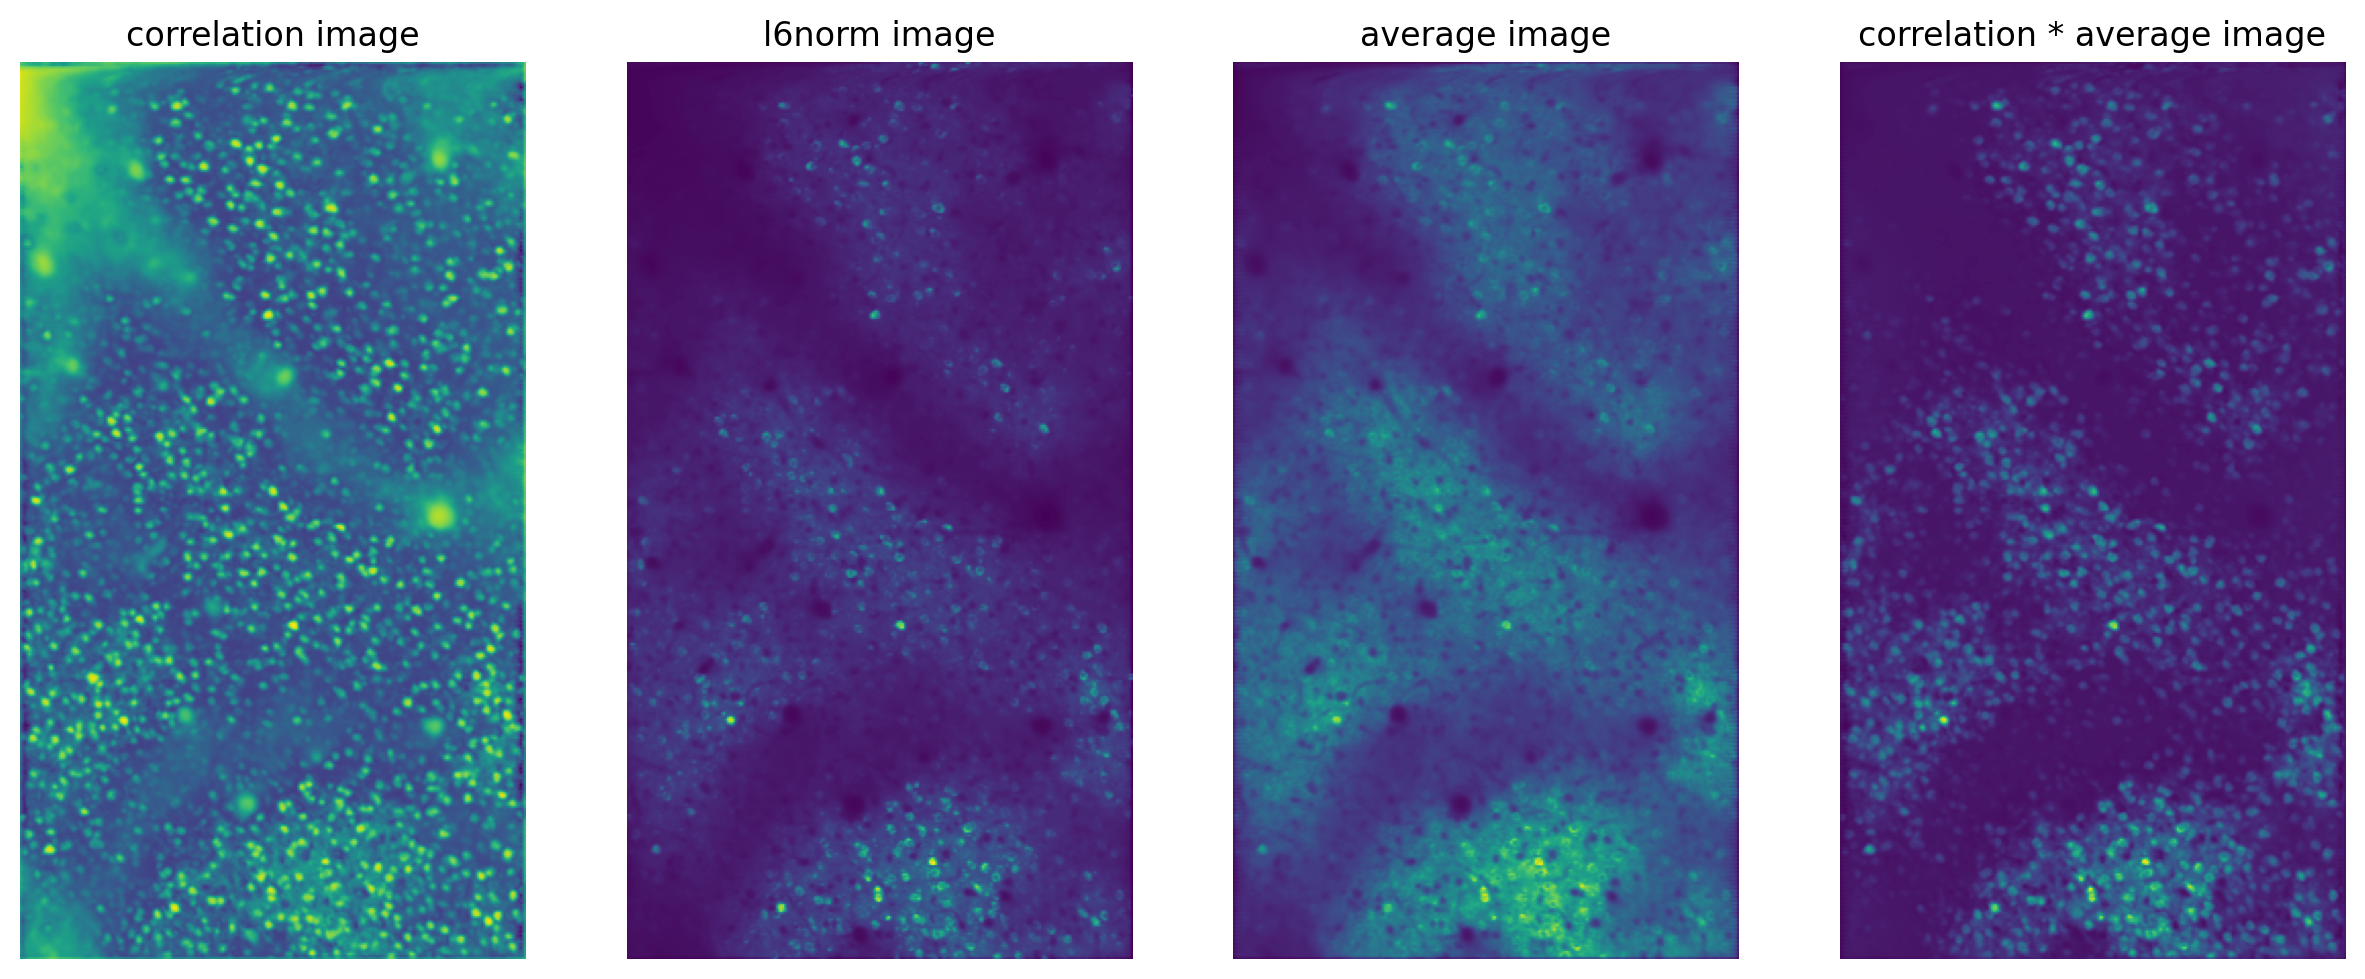

In [56]:
fig, axs = plt.subplots(1, 4, figsize=(15,6), dpi=200)
axs[0].imshow(corr)
axs[0].set_title('correlation image')
axs[1].imshow(l6)
axs[1].set_title('l6norm image')
axs[2].imshow(avg)
axs[2].set_title('average image')
axs[3].imshow(corr*avg) # gives a good view of the cell bodies and darkens vessels
axs[3].set_title('correlation * average image')
[ax.axis('off') for ax in axs];

### Mean Intensity

The mean intensity of the calcium signal for the entire field is computed per frame for the duration of the scan. This is found in `nda.MeanIntensity`. Periods of low intensity may indicate a low quality stretch of scan, for example where water might have temporarily run out between the microscope objective and imaging site.

In [57]:
intensities = (nda.MeanIntensity & field_key).fetch1('intensities')

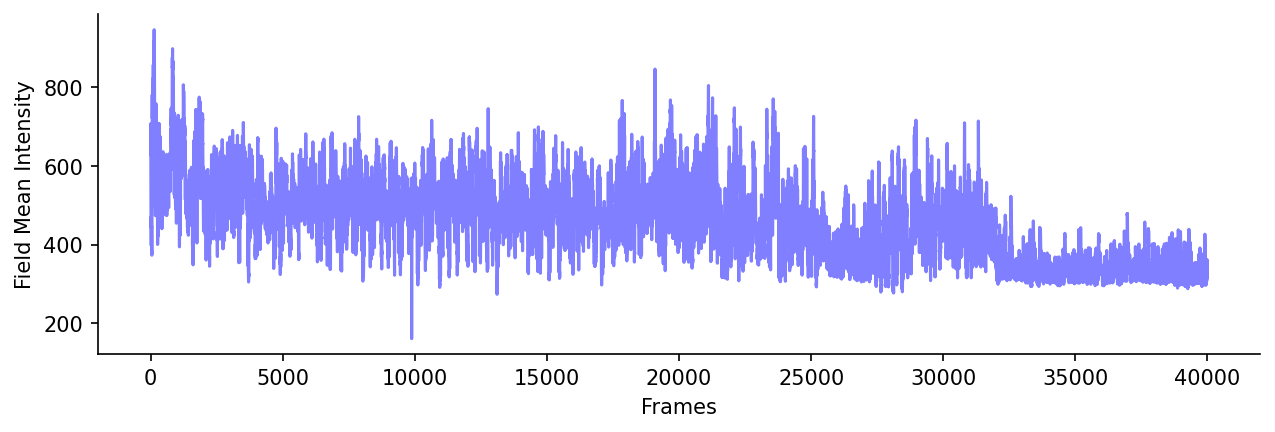

In [58]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)
ax.plot(intensities, c='b', alpha=0.5)
ax.set_xlabel('Frames')
ax.set_ylabel('Field Mean Intensity')
sns.despine()

### Masks

The functional ROI segmentation gives a set of 2D masks indexed by `mask_id`, which are unique per `field`. A cell that was scanned in more than one imaging field will have more than one mask.

In [59]:
nda.Segmentation & field_key

*session    *scan_idx    *field    *mask_id    pixels     weights   
+---------+ +----------+ +-------+ +---------+ +--------+ +--------+
4           7            4         1           =BLOB=     =BLOB=    
4           7            4         2           =BLOB=     =BLOB=    
4           7            4         3           =BLOB=     =BLOB=    
4           7            4         4           =BLOB=     =BLOB=    
4           7            4         5           =BLOB=     =BLOB=    
4           7            4         6           =BLOB=     =BLOB=    
4           7            4         7           =BLOB=     =BLOB=    
4           7            4         8           =BLOB=     =BLOB=    
4           7            4         9           =BLOB=     =BLOB=    
4           7            4         10          =BLOB=     =BLOB=    
4           7            4         11          =BLOB=     =BLOB=    
4           7            4         12          =BLOB=     =BLOB=    
   ...
 (Total: 1389)

Fetch masks and plot over the summary image to view them.

In [60]:
masks = func.get_all_masks(field_key) # function that will retrieve masks in convenient format

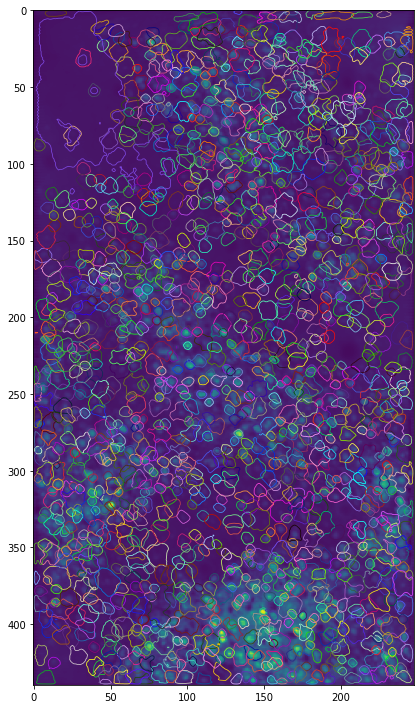

In [61]:
image_height, image_width, num_masks = masks.shape
figsize = np.array([image_width, image_height]) / min(image_height, image_width)
fig = plt.figure(figsize=figsize * 7)
plt.imshow(corr*avg)

cumsum_mask = np.empty([image_height, image_width])
for i in range(num_masks):
    mask = masks[:, :, i]

    ## Compute cumulative mass (similar to caiman)
    indices = np.unravel_index(
        np.flip(np.argsort(mask, axis=None), axis=0), mask.shape
    )  # max to min value in mask
    cumsum_mask[indices] = np.cumsum(mask[indices] ** 2) / np.sum(mask ** 2)

    ## Plot contour at desired threshold (with random color)
    random_color = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.contour(cumsum_mask, [0.97], linewidths=0.8, colors=[random_color])

### Calcium fluorescence traces

Each mask has a GCaMP6 fluorescence trace in `nda.Fluorescence`.

In [62]:
calcium_trace = (nda.Fluorescence() & field_key & {'mask_id': 500}).fetch1('trace')

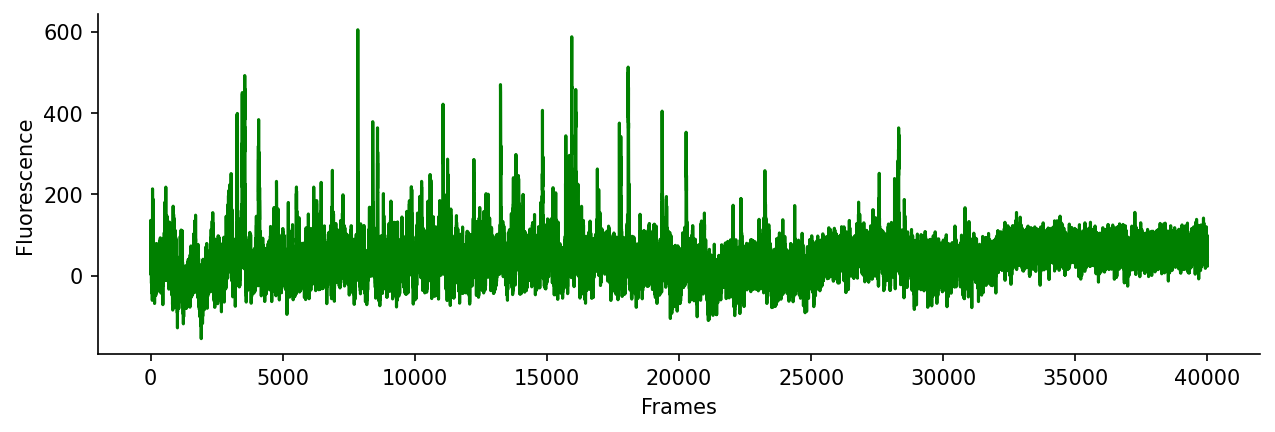

In [63]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)
ax.plot(calcium_trace, c='g')
ax.set_xlabel('Frames')
ax.set_ylabel('Fluorescence')
sns.despine()

### Single unit information

For the purposes of this schema, a `unit` is a re-indexing of all masks across all imaging fields of a scan and indexed by `unit_id`. `unit_id` is unique per scan.

Note: `unit_id` is not a consolidation step, only re-indexing. Therefore, if a cell was scanned in multiple imaging fields within the scan, just as it had multiple `mask_id's`, it will have multiple `unit_id's`. 

Information for all units in the scan can be found in `nda.ScanUnit`. This table can be used to relate `mask_id` to its `unit_id`.  

In [64]:
# unit coordinates (`um_x`, `um_y`, `um_z`) are in microns and in the original motor reference frame (see technical documentation for more info)
# unit coordinate (`px_x` and `px_y` are the unit coordinates in image pixels)
# this table can also be used to relate `unit_id's` and `mask_id's` that are used in nda.Segmentation and nda.Fluorescence
nda.ScanUnit() & scan_key

*session    *scan_idx    *unit_id    field     mask_id     um_x     um_y     um_z     px_x     px_y     ms_delay    
+---------+ +----------+ +---------+ +-------+ +---------+ +------+ +------+ +------+ +------+ +------+ +----------+
4           7            1           1         1           -778     -771     80       7        5        0           
4           7            2           1         2           -741     -766     80       22       7        0           
4           7            3           1         3           -691     -776     80       41       3        0           
4           7            4           1         4           -691     -766     80       42       8        0           
4           7            5           1         5           -702     -767     80       37       7        0           
4           7            6           1         6           -646     -764     80       60       8        0           
4           7            7           1         7           -553     -770     80       97       6        0           
4           7            8           1         8           -534     -758     80       105      11       0           
4           7            9           1         9           -499     -760     80       119      10       0           
4           7            10          1         10          -460     -768     80       134      7        0           
4           7            11          1         11          -362     -772     80       173      5        0           
4           7            12          1         12          -442     -675     80       141      44       2           
   ...
 (Total: 8395)

### Oracle score 

The oracle score is a leave-one-out correlation for repeated segments of stimulus. It provides an estimate of visual response reliability for a given unit over the course of the scan. For more detail see the technical documentation found [here](https://www.microns-explorer.org/cortical-mm3#f-data).

Oracle scores are found in `nda.Oracle`. 

In [65]:
oracles = (nda.Oracle & scan_key).fetch('pearson')

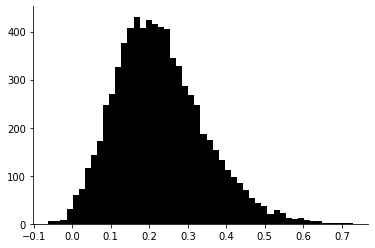

In [66]:
fig, ax = plt.subplots()
ax.hist(oracles, bins=50, color='k');
sns.despine()

In [67]:
high_oracle_percentile = np.percentile(oracles, 99)

Oracle scores greater than a threshold value can be specified by restricting the table with a string: `'pearson>x'` where `x` is the oracle value threshold.

In [68]:
high_oracle_table = nda.Oracle & scan_key & f'pearson>{high_oracle_percentile}'
high_oracle_table

*session    *scan_idx    *unit_id    trials     pearson     
+---------+ +----------+ +---------+ +--------+ +----------+
4           7            130         60         0.623745    
4           7            327         60         0.61131     
4           7            493         60         0.54457     
4           7            688         60         0.561252    
4           7            756         60         0.617953    
4           7            775         60         0.638734    
4           7            795         60         0.613519    
4           7            907         60         0.574646    
4           7            1070        60         0.553697    
4           7            1177        60         0.57389     
4           7            1262        60         0.594857    
4           7            1552        60         0.593425    
   ...
 (Total: 75)

Select the nth entry in the table by passing an `offset` and `limit` to the `fetch` method.

In [69]:
unit_key = high_oracle_table.fetch('KEY', offset=10, limit=1)[0]
unit_key

{'session': 4, 'scan_idx': 7, 'unit_id': 1262}

### Area membership

Computed area membership labels are found in `nda.AreaMembership`.

In [70]:
nda.AreaMembership()

*session    *scan_idx    *unit_id    brain_area    
+---------+ +----------+ +---------+ +------------+
4           7            1           LM            
4           7            2           LM            
4           7            3           LM            
4           7            4           LM            
4           7            5           LM            
4           7            6           LM            
4           7            7           LM            
4           7            8           LM            
4           7            9           LM            
4           7            10          LM            
4           7            11          LM            
4           7            12          LM            
   ...
 (Total: 168971)

### Spike traces

Spike traces are in `nda.Activity` and associated with single units (`unit_id's`).

In [71]:
nda.Activity() & unit_key

*session    *scan_idx    *unit_id    trace     
+---------+ +----------+ +---------+ +--------+
4           7            1262        =BLOB=    
 (Total: 1)

In [72]:
spike_trace = (nda.Activity() & unit_key).fetch1('trace')

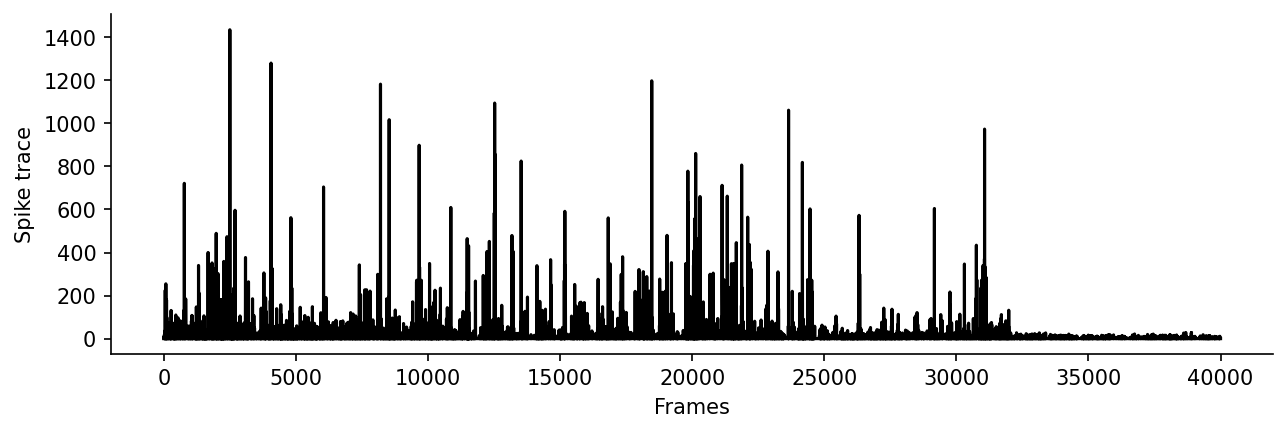

In [73]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)
ax.plot(spike_trace, c='k')
ax.set_xlabel('Frames')
ax.set_ylabel('Spike trace')
sns.despine()

### View  fluorescence trace, and spike trace for the same unit

Use `nda.ScanUnit` to bridge between `unit_id` and `mask_id` to plot both the calcium trace spike trace and for a single unit.

In [74]:
nda.Fluorescence & (nda.ScanUnit & unit_key)

*session    *scan_idx    *field    *mask_id    trace     
+---------+ +----------+ +-------+ +---------+ +--------+
4           7            3         167         =BLOB=    
 (Total: 1)

In [75]:
calcium_trace = (nda.Fluorescence & (nda.ScanUnit & unit_key)).fetch1('trace')

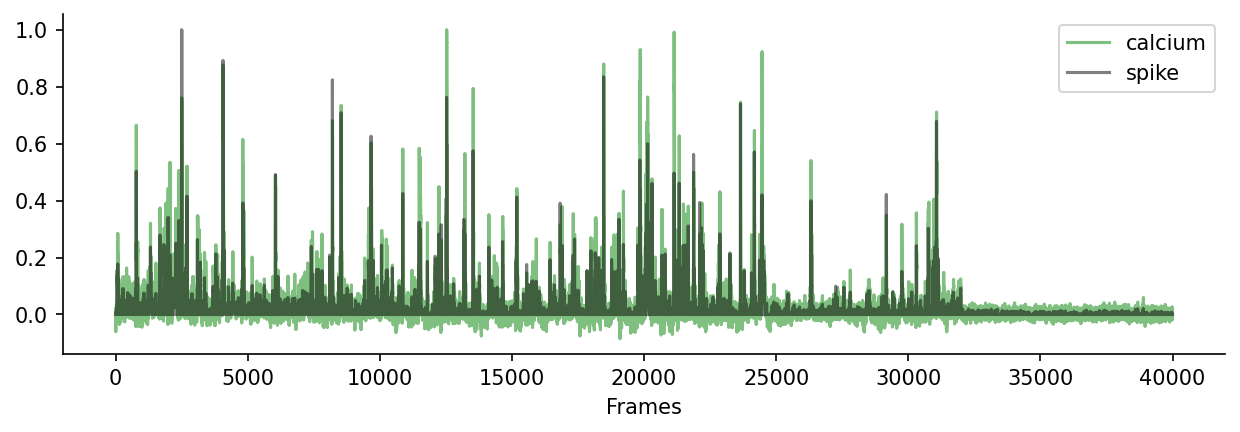

In [76]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)
ax.plot(calcium_trace/ np.max(calcium_trace), c='g', alpha=0.5, label='calcium')
ax.plot(spike_trace/ np.max(spike_trace), c='k', label='spike', alpha=0.5)
ax.set_xlabel('Frames')
ax.legend()
sns.despine()

### Plot tuning curve

The function `concatenate_monet2` in the `func` module retrieve the directional trials and responses for the functional unit from the Monet2 stimulus type and the function `von_mises_pdf` fits a Von Mises curve to the data. The individual trial response means and von mises curve are plotted below.

In [77]:
indices, directions, responses = func.concatenate_monet2(unit_key) # fetch Monet2 stimulus directions and responses for specified functional unit

In [78]:
x_pdf, pdf = func.von_mises_pdf(directions, responses) # compute von mises probability density function

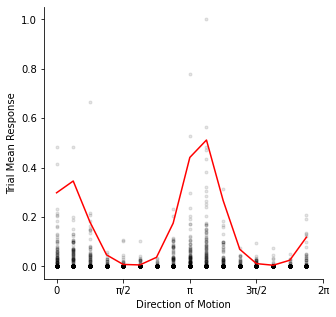

In [79]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(directions, responses/np.max(responses), '.k', alpha=0.1)
ax.plot(x_pdf, pdf, 'r')
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax.set_xticklabels(['0', '\u03C0/2', '\u03C0', '3\u03C0/2', '2\u03C0'])
ax.set_ylabel('Trial Mean Response')
ax.set_xlabel('Direction of Motion')
sns.despine()
plt.show()
plt.close()

## Field to Stack registration

A high spatial resolution structural 2P-Stack was acquired to serve as a common reference frame between the 2P functional imaging planes and the EM volume. Each imaging field was registered into the stack using affine registration learned via gradient ascent. For more detail see technical methods. 

### Stack information

The information on the structural 2P stack can be found in `nda.Stack`. 

In [80]:
nda.Stack()

*stack_session *stack_idx    z         y            x           px_depth     px_height     px_width     um_depth     um_height     um_width     surf_z    
+------------+ +-----------+ +-------+ +----------+ +---------+ +----------+ +-----------+ +----------+ +----------+ +-----------+ +----------+ +--------+
9              19            314.0     -173.688     -236.91     335          661           706          670.0        1322.0        1412.0       -21.0     
 (Total: 1)

The affine matrix resulting from registration of each imaging field into the stack is located in `nda.Registration`. The attribute `reg_field` is the extracted stack image corresponding to the field grid after registration. In a good registration, the functional summary image in `nda.SummaryImages` and `reg_field` will be very similar. 

### Field registration

In [81]:
# affine matrix parameters for each field registered into the stack
nda.Registration() & field_key

*stack_session *stack_idx    *session    *scan_idx    *field    a11         a21            a31           a12            a22          a32            reg_x       reg_y        reg_z       score        reg_field 
+------------+ +-----------+ +---------+ +----------+ +-------+ +---------+ +------------+ +-----------+ +------------+ +----------+ +------------+ +---------+ +----------+ +---------+ +----------+ +--------+
9              19            4           7            4         1.00784     -0.00337667    -0.017749     -0.0231734     0.994399     0.00351191     94.7115     -276.434     217.736     0.646221     =BLOB=    
 (Total: 1)

In [82]:
reg_field = (nda.Registration() & field_key).fetch1('reg_field')

The functional summary image and registered stack field image are plotted for visual comparison. 

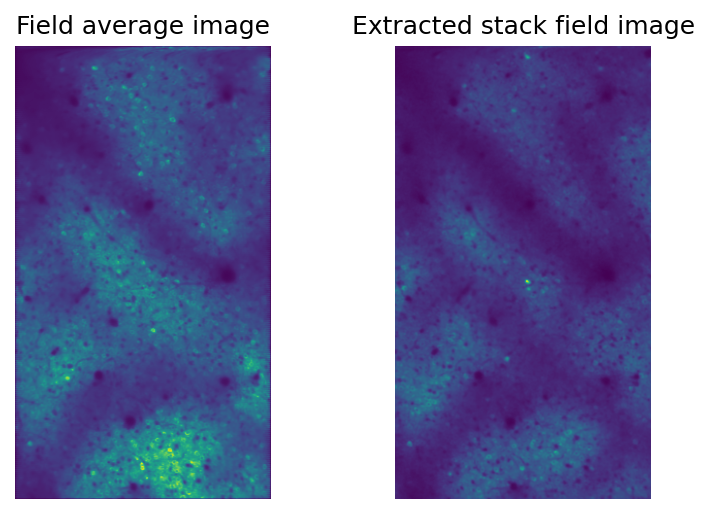

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(6,4), dpi=150)
axs[0].imshow(avg)
axs[0].set_title('Field average image')
axs[1].imshow(reg_field)
axs[1].set_title('Extracted stack field image')
[ax.axis('off') for ax in axs];

### Field grid after registration into 2P stack

The coordinates of the imaging field after registration into the 2P stack can be obtained using the function `get_grid`.  

The grid that is returned is in the original reference frame of the 2P stack, inherited from the acquisition software, called `motor` reference frame. 

In [84]:
grid = func.get_grid(field_key) # fetch registered grid in motor reference frame at 1um/ pixel resolution
grid.shape

(1100, 620, 3)

We can use the known center and dimensions of the 2P stack to convert the grid reference frame to one where the (0, 0, 0) coordinate is in the back left corner of the 3D volume. 

We refer to this as the `numpy` reference frame. This conversion is necessary to be able to further convert from 2P to EM coordinate systems. 

In [85]:
center_x, center_y, center_z = nda.Stack.fetch1('x', 'y', 'z') # get stack center in um
length_x, length_y, length_z = nda.Stack.fetch1('um_width', 'um_height', 'um_depth') # get stack dimensions in um

np_grid = grid - np.array([center_x, center_y, center_z]) + np.array([length_x, length_y, length_z]) / 2 # convert grid to the numpy reference frame

np_grid.shape

(1100, 620, 3)

### Convert field grid to EM coordinates

We can use the coregistration provided by AIBS to convert between 2P Stack and EM reference frames. The source of the coregistration is [here](https://github.com/AllenInstitute/em_coregistration/tree/phase3).

We have ingested a copy of the transform solution into DataJoint and provided helper functions to facilitate it's use. The transform arguments and solution are located in `nda.Coregistration`. 

There are two versions under the `version` attribute. The correct version to use is `phase3` as `phase2` is deprecated and may be removed in the future.

There are two transform types: `spline` and `linear`. `spline` is recommended as it is the most accurate solution. It does take longer to run than `linear`, which can be used when speed is preferred over precision. Note: `linear` is not strictly a linear transformation, but the solution is more rigid than `spline` and may be preferred over `spline` in some regions of the volume, where `spline` may yield non-linear distortions.

Each direction of the transformation is solved independently and may slightly differ. `2PEM` is the 2P to EM direction, meaning 2P coordinates are provided and EM coordinates are returned. Vice versa for `EM2P`.

The attribute `transform_id` indexes the different available transforms. Taking into account the information above, only transform_id's `5-8` corresponding to `phase3` should be used. transform_id's: `5 & 6` are `spline` and 2P to EM, EM to 2P direction respectively. `7 & 8` are `linear` and 2P to EM, EM to 2P direction respectively. 

In [86]:
nda.Coregistration()

*stack_session *stack_idx    *transform_id  version     direction     transform_type transform_ transform_
+------------+ +-----------+ +------------+ +---------+ +-----------+ +------------+ +--------+ +--------+
9              19            1              phase2      2PEM          spline         =BLOB=     =BLOB=    
9              19            2              phase2      EM2P          spline         =BLOB=     =BLOB=    
9              19            3              phase2      2PEM          linear         =BLOB=     =BLOB=    
9              19            4              phase2      EM2P          linear         =BLOB=     =BLOB=    
9              19            5              phase3      2PEM          spline         =BLOB=     =BLOB=    
9              19            6              phase3      EM2P          spline         =BLOB=     =BLOB=    
9              19            7              phase3      2PEM          linear         =BLOB=     =BLOB=    
9              19            8              phase3      EM2P          linear         =BLOB=     =BLOB=    
 (Total: 8)

The function `fetch_coreg` and `coreg_transform` are available to facilitate the use of the coregistration. To use `fetch_coreg`, pass in the desired `transform_id` and the parameters of the transform will be returned.

In [87]:
transform_params = func.fetch_coreg(transform_id=5) # phase3 "spline" 2P -> #EM transform

Now we can pass the array of 3D coordinates we wish to transform and the transform parameters to `coreg_transform`. We will transform the 2P field grid obtained above to EM coordinates.

In [88]:
reshaped_grid = np_grid.reshape(-1, 3) # reshape grid to n X 3

em_grid = func.coreg_transform(reshaped_grid, **transform_params) # pass in array of coordinates and transform parameters

In [89]:
em_grid.shape

(682000, 3)

Note: we can bypass the use of `fetch_coreg` by passing `transform_id` directly to `coreg_transform`. This may be preferable when performing a single transformation. However, when looping through multiple transformations, for efficiency it is recommended to run `fetch_coreg` first outside of the loop and pass the `transform_params` to `coreg_transform` inside the loop.

### Visualize field grid in EM coordinates in Neuroglancer

We can use [Neuroglancer](github.com/google/neuroglancer) to view the grid in EM space. 

Programmatic editing of Neuroglancer links can be accomplished using the Seung lab/ AIBS package [nglui](https://github.com/seung-lab/NeuroglancerAnnotationUI) in conjunction with CAVE.

CAVE (Connectome Annotation Versioning Engine) is built and supported by a collaboration between the Seung lab at Princeton and the Allen Institute for Brain Science. It allows for programmatic access to the tables associated with Minnie and other datasets. [Github](https://github.com/seung-lab/CAVEclient) 

CAVE setup instructions are [here](https://github.com/AllenInstitute/MicronsBinder/blob/master/notebooks/mm3_intro/CAVEsetup.ipynb).

CAVE tutorial for querying the data is [here](https://github.com/AllenInstitute/MicronsBinder/blob/master/notebooks/mm3_intro/SynapseAndAnnotationQuery.ipynb).

In [90]:
import pandas as pd
from caveclient import CAVEclient
from nglui import statebuilder # generate links in Seung lab a custom Neuroglancer deployment called Neuromancer

Load the public client for accessing the datastack in CAVE.

In [91]:
# this is the datastack name of the public release
# passing it will auto-configure many of the services
client = CAVEclient('minnie65_public_v117')

We need to load the grid into a pandas dataframe with a single column containing 3D point location.

In [92]:
grid_df = pd.DataFrame([[[e[0],e[1],e[2]]] for e in em_grid[::200]]).rename(columns={0:'grid_xyz'}) # sample every 200th grid point for viewing in Neuroglancer

Now we are ready to generate a Neuroglancer link to view the grid in EM space.

In [93]:
em_layer = statebuilder.ImageLayerConfig(client.info.image_source()) # public em source
seg_layer = statebuilder.SegmentationLayerConfig(client.info.segmentation_source(), name='seg') # public segmentation source
anno_layer = statebuilder.AnnotationLayerConfig(name='field-grid', mapping_rules=statebuilder.PointMapper('grid_xyz'), color='red') # annotation layer for grid 

view_kws = {'layout': '3d',
            'zoom_3d': 18000}

sb = statebuilder.StateBuilder([em_layer, seg_layer, anno_layer], view_kws=view_kws)
sb.render_state(grid_df, return_as='html')

### Transform cell coordinates from stack to EM coordinates

We can also transform the centroids of functional units to EM coordinates. The functional unit centroids in 2P stack coordinates are found in `nda.StackUnit`. 

`motor_x`, `motor_y`, `motor_z` represent the default motor reference frame inherited from the acquisition system.

`np_x`, `np_y`, `np_z` represent the adjusted reference frame where (0,0,0) is located in the top, back, left corner of the volume. This adjustment is necessary to convert to EM coordinates

In [94]:
nda.StackUnit() & field_key

*stack_session *stack_idx    *session    *scan_idx    *field    *unit_id    motor_x      motor_y      motor_z     np_x        np_y      np_z      
+------------+ +-----------+ +---------+ +----------+ +-------+ +---------+ +----------+ +----------+ +---------+ +---------+ +-------+ +--------+
9              19            4           7            4         2551        -168.584     -816.214     220.685     774.33      18.47     241.69    
9              19            4           7            4         2552        -98.5568     -794.077     219.522     844.35      40.61     240.52    
9              19            4           7            4         2553        -10.5446     -786.914     217.995     932.37      47.77     239.0     
9              19            4           7            4         2554        29.4794      -774.619     217.329     972.39      60.07     238.33    
9              19            4           7            4         2555        60.0042      -787.15      216.753     1002.91     47.54     237.75    
9              19            4           7            4         2556        100.434      -792.257     216.025     1043.34     42.43     237.03    
9              19            4           7            4         2557        112.974      -789.814     215.812     1055.88     44.87     236.81    
9              19            4           7            4         2558        138.112      -787.412     215.377     1081.02     47.28     236.38    
9              19            4           7            4         2559        151.0        -799.884     215.111     1093.91     34.8      236.11    
9              19            4           7            4         2560        131.306      -819.705     215.396     1074.22     14.98     236.4     
9              19            4           7            4         2561        176.543      -814.885     214.615     1119.45     19.8      235.61    
9              19            4           7            4         2562        180.945      -787.556     214.623     1123.86     47.13     235.62    
   ...
 (Total: 1389)

Fetch `np_x`, `np_y`, `np_z` and format as an `n x 3` coordinate array.

In [95]:
unit_xyz_2P = np.stack((nda.StackUnit() & field_key).fetch('np_x', 'np_y', 'np_z'), -1)

In [96]:
unit_xyz_2P.shape

(1389, 3)

Convert the 2P coordinates to EM coordinates and format as a pandas dataframe.

In [97]:
unit_xyz_em = func.coreg_transform(unit_xyz_2P, transform_id=5)

In [98]:
unit_xyz_em_df = pd.DataFrame([[[e[0],e[1],e[2]]] for e in unit_xyz_em]).rename(columns={0:'unit_xyz_em'})

View in Neuroglancer.

In [99]:
em_layer = statebuilder.ImageLayerConfig(client.info.image_source()) # public em source
seg_layer = statebuilder.SegmentationLayerConfig(client.info.segmentation_source(), name='seg') # public segmentation source
anno_layer = statebuilder.AnnotationLayerConfig(name='field-units', mapping_rules=statebuilder.PointMapper('unit_xyz_em'), color='red') # annotation layer for grid 

view_kws = {'layout': '3d',
            'zoom_3d': 18000}

sb = statebuilder.StateBuilder([em_layer, seg_layer, anno_layer], view_kws=view_kws)
sb.render_state(unit_xyz_em_df, return_as='html')

## Visualize area labels in 2P stack space

View area labels for units in 2D space (x, y) in `numpy` reference frame.

In [100]:
area, x, y = (nda.AreaMembership * nda.StackUnit).fetch('brain_area', 'np_x', 'np_y')

In [101]:
color_dict = {'LM':'blue', 'AL': 'green', 'RL': 'purple', 'V1': 'red'}

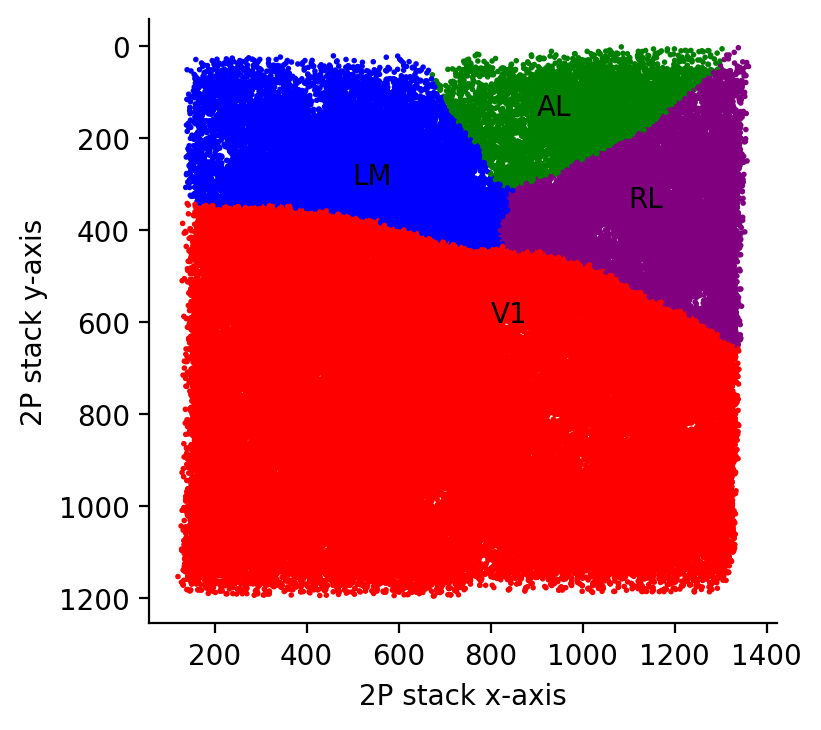

In [102]:
fig, ax = plt.subplots(dpi=200)
ax.scatter(x, y, color=[color_dict[a] for a in area], s=1)
ax.set_aspect('equal')
ax.invert_yaxis()
ax.set_xlabel('2P stack x-axis')
ax.set_ylabel('2P stack y-axis')
ax.annotate('LM', (500, 300))
ax.annotate('AL', (900, 150))
ax.annotate('RL', (1100, 350))
ax.annotate('V1', (800, 600))
sns.despine()